In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [85]:
data = pd.read_csv("D:/Mental Health Prediction/data/survey.csv")

In [86]:
data.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [87]:
#DATA CLEANING

print(data.columns)
data_removed = data.drop(['Timestamp', 'Country', 'state', 'comments'], axis=1)
data_removed.isnull().sum()


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [88]:
data_removed['self_employed'].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64

In [89]:
data_removed['self_employed'].fillna('No', inplace = True)
data_removed['work_interfere'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30352\1773677866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_removed['self_employed'].fillna('No', inplace = True)


work_interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

In [90]:
data_removed['work_interfere'].fillna('N/A', inplace = True)

data_removed.drop(data_removed[(data_removed['Age'] > 60) | (data_removed['Age'] < 18)].index, inplace=True)

data_removed['Gender'].replace([
    'Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
    'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
    'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',
], 'Male', inplace=True)

data_removed['Gender'].replace([
    'Female ', 'female', 'F', 'f', 'Woman', 'Female',
    'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
    'woman',
], 'Female', inplace=True)

data_removed['Gender'].replace([
    'Female (trans)', 'queer/she/they', 'non-binary',
    'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
    'Agender', 'A little about you', 'Nah', 'All',
    'ostensibly male, unsure what that really means',
    'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
    'Guy (-ish) ^_^', 'Trans woman',
], 'Non-Binary', inplace=True)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_30352\2341219521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_removed['work_interfere'].fillna('N/A', inplace = True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30352\2341219521.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30352\4135080450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Age'])  #univariate Analysis


<Axes: xlabel='Age', ylabel='Density'>

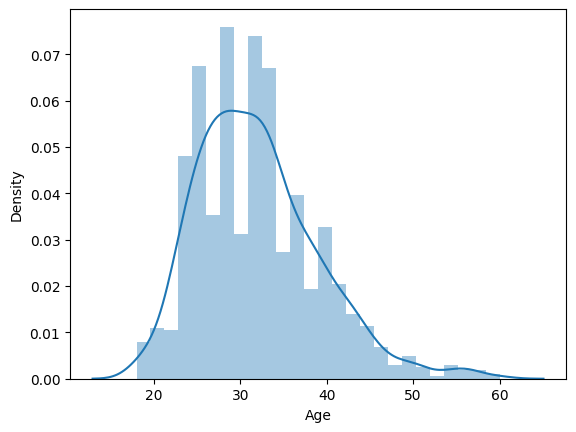

In [91]:
#Data Analysis and Visualisation
data = data_removed  #For ease
sb.distplot(data['Age'])  #univariate Analysis



Text(0.5, 1.0, 'Employment Type')

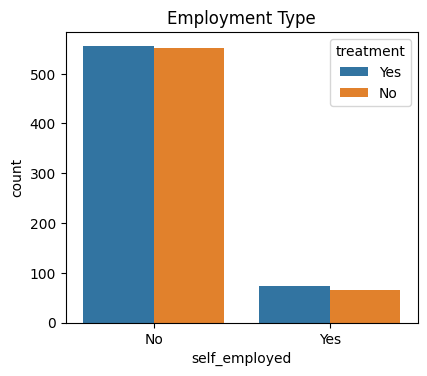

In [92]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data = data, x = 'self_employed', hue='treatment')
plt.title('Employment Type')

Text(0.5, 1.0, 'Leave')

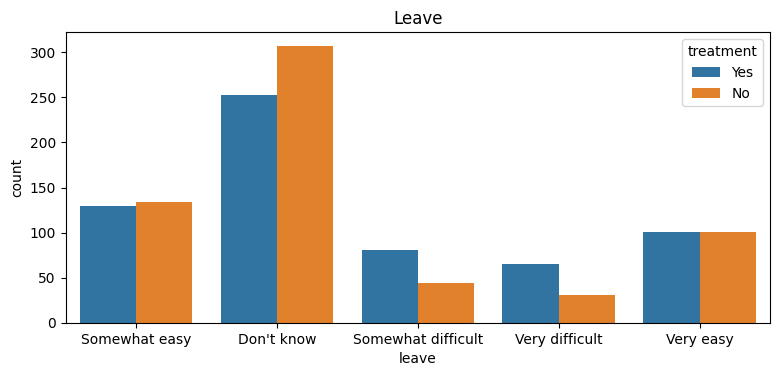

In [93]:
plt.figure(figsize=(20,40))
plt.subplot(9,2,11)
sb.countplot(data = data, x = 'leave', hue='treatment')
plt.title('Leave')

Text(0.5, 1.0, 'Mental Health Consequences')

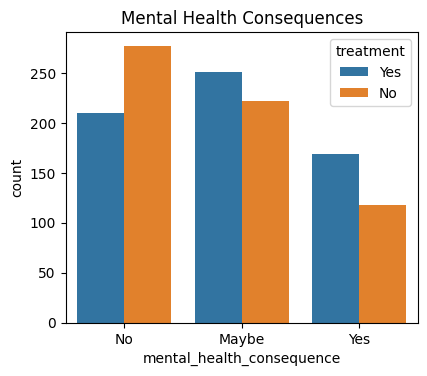

In [94]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data = data, x = 'mental_health_consequence', hue='treatment')
plt.title('Mental Health Consequences')

Text(0.5, 1.0, 'Discussion with Coworker')

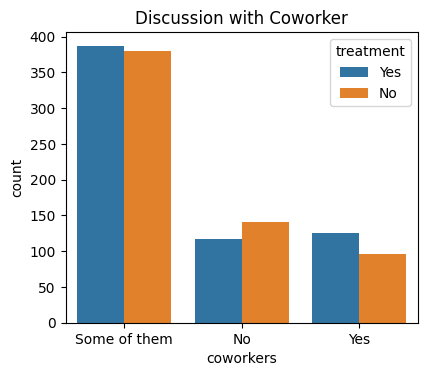

In [95]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data = data, x = 'coworkers', hue='treatment')
plt.title('Discussion with Coworker')

Text(0.5, 1.0, 'Discussion with Supervisor')

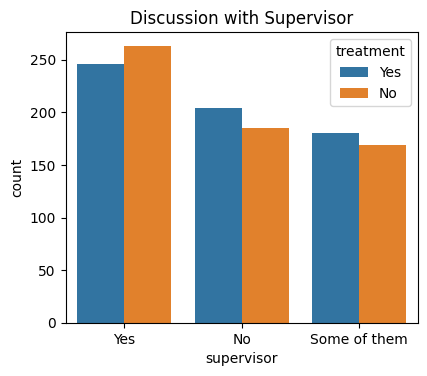

In [96]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data = data, x = 'supervisor', hue='treatment')
plt.title('Discussion with Supervisor')

Text(0.5, 1.0, 'Discussion with interviewer (MENTAL)')

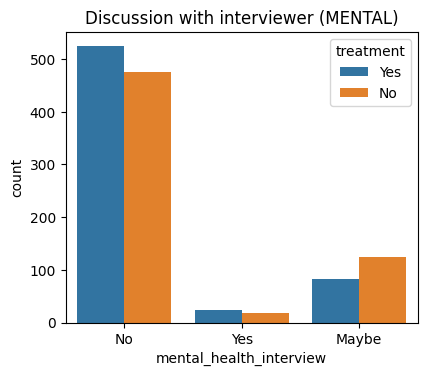

In [97]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,15)
sb.countplot(data = data, x = 'mental_health_interview', hue='treatment')
plt.title('Discussion with interviewer (MENTAL)')

Text(0.5, 1.0, 'Discussion with interviewer (Physical)')

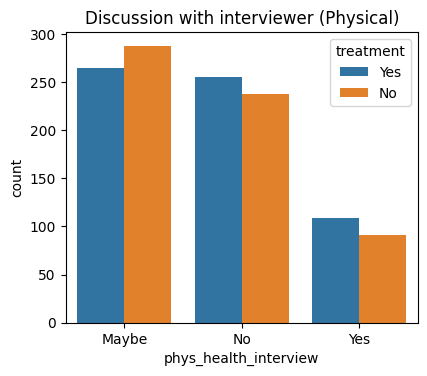

In [98]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data = data, x = 'phys_health_interview', hue='treatment')
plt.title('Discussion with interviewer (Physical)')

Text(0.5, 1.0, 'Consequence after Disclosure')

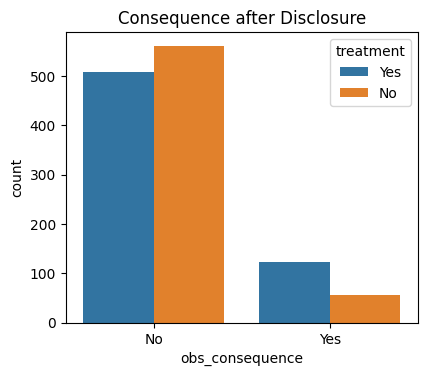

In [99]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data = data, x = 'obs_consequence', hue='treatment')
plt.title('Consequence after Disclosure')

In [100]:
#Descriptive analysis
data.describe(include='all')


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,3,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,983,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#model building
X = data.drop('treatment', axis=1)
y = data['treatment']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder


ct = ColumnTransformer([('oe', OrdinalEncoder(), ['Gender', 'self_employed', 'family_history',
    'work_interfere', 'no_employees', 'remote_work', 'tech_company',
    'benefits', 'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence'])], remainder='passthrough')

X = ct.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(y)

import joblib
joblib.dump(ct, 'feature_values')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=49)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((872, 22), (375, 22), (872,), (375,))

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc

model_dict = {}

model_dict['Logistic regression'] = LogisticRegression(solver='liblinear', random_state=49)
model_dict['KNN Classifier'] = KNeighborsClassifier()
model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49)
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)
model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)
model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)
model_dict['XGB Classifier'] = XGBClassifier(random_state=49)

In [103]:
def model_test(X_train, X_test, y_train, y_test, model, model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('========================={}========================='.format(model_name))
    print('Score is : {}'.format(accuracy))
    print()
    
for model_name, model in model_dict.items():
        model_test(X_train, X_test, y_train, y_test, model, model_name)

=========================Logistic regression=========================
Score is : 0.848

=========================KNN Classifier=========================
Score is : 0.7813333333333333

=========================Decision Tree Classifier=========================
Score is : 0.7946666666666666

=========================Random Forest Classifier=========================
Score is : 0.8533333333333334

=========================AdaBoost Classifier=========================
Score is : 0.8693333333333333

=========================Gradient Boosting Classifier=========================
Score is : 0.84

=========================XGB Classifier=========================
Score is : 0.84



In [104]:
abc = AdaBoostClassifier(random_state=99)
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)
print('Accuracy of AdaBoost-',accuracy_score(y_test,pred_abc))

Accuracy of AdaBoost- 0.8693333333333333


In [105]:
from sklearn.model_selection import RandomizedSearchCV

params_abc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
}

abc_random = RandomizedSearchCV(
    random_state=49,
    estimator=abc,
    param_distributions=params_abc,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

In [106]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [107]:
abc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [108]:
abc_random.best_params_

{'n_estimators': 46, 'learning_rate': 0.99}

In [109]:
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=11, learning_rate=1.02)
abc_tuned.fit(X_train, y_train)
pred_abc_tuned = abc_tuned.predict(X_test)
print("Accuracy of AdaBoost (tuned):", accuracy_score(y_test, pred_abc_tuned))

Accuracy of AdaBoost (tuned): 0.872


Text(50.722222222222214, 0.5, 'Actual')

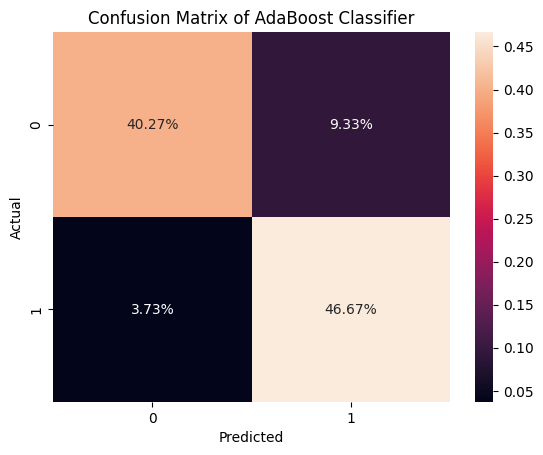

In [111]:
cf_matrix = confusion_matrix(y_test, pred_abc)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')



Text(50.722222222222214, 0.5, 'Actual')

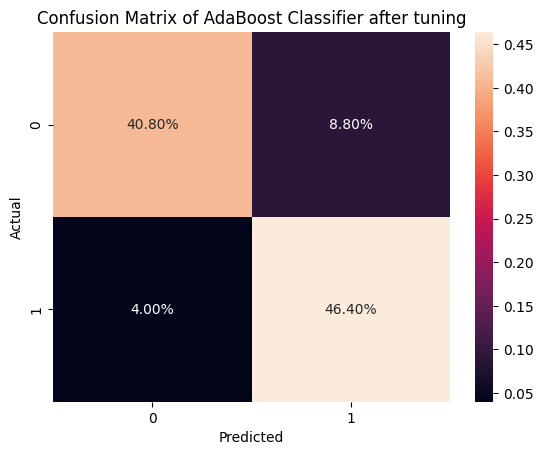

In [112]:
cf_matrix = confusion_matrix(y_test, pred_abc_tuned)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of AdaBoost Classifier after tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')

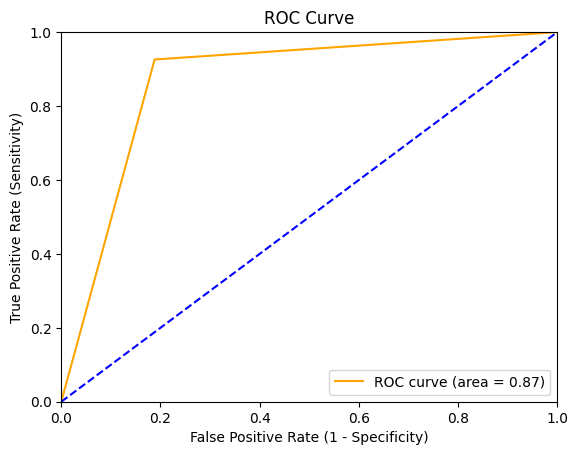

(array([0.        , 0.18817204, 1.        ]),
 array([0.        , 0.92592593, 1.        ]),
 array([inf,  1.,  0.]))

In [115]:
from sklearn import metrics
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = metrics.auc(fpr_abc, tpr_abc)
plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()
roc_curve(y_test, pred_abc)

In [116]:
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       186
           1       0.83      0.93      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



In [119]:
print(classification_report(y_test, pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       186
           1       0.84      0.92      0.88       189

    accuracy                           0.87       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.88      0.87      0.87       375



In [121]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(abc_tuned, file)
